# Naive_bayes

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#!pip install naive-bayes

In [3]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
## Read the given data
train = pd.read_csv('SalaryData_Train.csv')
test = pd.read_csv('SalaryData_Test.csv')

In [5]:
#copying the data
df1 = train.copy()
df2 = test.copy()

In [6]:
df1.head()

age          workclass   education  educationno        maritalstatus  \
0   39          State-gov   Bachelors           13        Never-married   
1   50   Self-emp-not-inc   Bachelors           13   Married-civ-spouse   
2   38            Private     HS-grad            9             Divorced   
3   53            Private        11th            7   Married-civ-spouse   
4   28            Private   Bachelors           13   Married-civ-spouse   

           occupation    relationship    race      sex  capitalgain  \
0        Adm-clerical   Not-in-family   White     Male         2174   
1     Exec-managerial         Husband   White     Male            0   
2   Handlers-cleaners   Not-in-family   White     Male            0   
3   Handlers-cleaners         Husband   Black     Male            0   
4      Prof-specialty            Wife   Black   Female            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            13   United-States   <=50K  
2            0            40   United-States   <=50K  
3            0            40   United-States   <=50K  
4            0            40            Cuba   <=50K

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [8]:
df1.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
df2.head()

age   workclass      education  educationno        maritalstatus  \
0   25     Private           11th            7        Never-married   
1   38     Private        HS-grad            9   Married-civ-spouse   
2   28   Local-gov     Assoc-acdm           12   Married-civ-spouse   
3   44     Private   Some-college           10   Married-civ-spouse   
4   34     Private           10th            6        Never-married   

           occupation    relationship    race    sex  capitalgain  \
0   Machine-op-inspct       Own-child   Black   Male            0   
1     Farming-fishing         Husband   White   Male            0   
2     Protective-serv         Husband   White   Male            0   
3   Machine-op-inspct         Husband   Black   Male         7688   
4       Other-service   Not-in-family   White   Male            0   

   capitalloss  hoursperweek          native  Salary  
0            0            40   United-States   <=50K  
1            0            50   United-States   <=50K  
2            0            40   United-States    >50K  
3            0            40   United-States    >50K  
4            0            30   United-States   <=50K

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [11]:
df2.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [12]:
train1=df1.iloc[:,0:13]
train1=pd.get_dummies(train1)
train1.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   39           13         2174            0            40   
1   50           13            0            0            13   
2   38            9            0            0            40   
3   53            7            0            0            40   
4   28           13            0            0            40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                         True  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0             False                False             False          False   
1             False                False             False          False   
2             False                False             False          False   
3             False                False             False          False   
4             False                False             False          False   

   native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0           False             False                    False   
1           False             False                    False   
2           False             False                    False   
3           False             False                    False   
4           False             False                    False   

   native_ United-States  native_ Vietnam  native_ Yugoslavia  
0                   True            False               False  
1                   True            False               False  
2                   True            False               False  
3                   True            False               False  
4                  False            False               False  

[5 rows x 102 columns]

In [13]:
test1=df2.iloc[:,0:13]
test1=pd.get_dummies(test1)
test1.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   25            7            0            0            40   
1   38            9            0            0            50   
2   28           12            0            0            40   
3   44           10         7688            0            40   
4   34            6            0            0            30   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False                True   
1                   False                 False                True   
2                   False                  True               False   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                        False  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Portugal  native_ Puerto-Rico  native_ Scotland  native_ South  \
0             False                False             False          False   
1             False                False             False          False   
2             False                False             False          False   
3             False                False             False          False   
4             False                False             False          False   

   native_ Taiwan  native_ Thailand  native_ Trinadad&Tobago  \
0           False             False                    False   
1           False             False                    False   
2           False             False                    False   
3           False             False                    False   
4           False             False                    False   

   native_ United-States  native_ Vietnam  native_ Yugoslavia  
0                   True            False               False  
1                   True            False               False  
2                   True            False               False  
3                   True            False               False  
4                   True            False               False  

[5 rows x 102 columns]

In [14]:
finaltrain = pd.concat([train1, df1['Salary']],axis=1)
finaltrain.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   39           13         2174            0            40   
1   50           13            0            0            13   
2   38            9            0            0            40   
3   53            7            0            0            40   
4   28           13            0            0            40   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False               False   
1                   False                 False               False   
2                   False                 False                True   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                         True  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Puerto-Rico  native_ Scotland  native_ South  native_ Taiwan  \
0                False             False          False           False   
1                False             False          False           False   
2                False             False          False           False   
3                False             False          False           False   
4                False             False          False           False   

   native_ Thailand  native_ Trinadad&Tobago  native_ United-States  \
0             False                    False                   True   
1             False                    False                   True   
2             False                    False                   True   
3             False                    False                   True   
4             False                    False                  False   

   native_ Vietnam  native_ Yugoslavia  Salary  
0            False               False   <=50K  
1            False               False   <=50K  
2            False               False   <=50K  
3            False               False   <=50K  
4            False               False   <=50K  

[5 rows x 103 columns]

In [15]:
finaltest = pd.concat([test1, df2['Salary']],axis=1)
finaltest.head()

age  educationno  capitalgain  capitalloss  hoursperweek  \
0   25            7            0            0            40   
1   38            9            0            0            50   
2   28           12            0            0            40   
3   44           10         7688            0            40   
4   34            6            0            0            30   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                   False                 False                True   
1                   False                 False                True   
2                   False                  True               False   
3                   False                 False                True   
4                   False                 False                True   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  ...  \
0                    False                        False  ...   
1                    False                        False  ...   
2                    False                        False  ...   
3                    False                        False  ...   
4                    False                        False  ...   

   native_ Puerto-Rico  native_ Scotland  native_ South  native_ Taiwan  \
0                False             False          False           False   
1                False             False          False           False   
2                False             False          False           False   
3                False             False          False           False   
4                False             False          False           False   

   native_ Thailand  native_ Trinadad&Tobago  native_ United-States  \
0             False                    False                   True   
1             False                    False                   True   
2             False                    False                   True   
3             False                    False                   True   
4             False                    False                   True   

   native_ Vietnam  native_ Yugoslavia  Salary  
0            False               False   <=50K  
1            False               False   <=50K  
2            False               False    >50K  
3            False               False    >50K  
4            False               False   <=50K  

[5 rows x 103 columns]

In [16]:
# Finaltrain data
X = finaltrain.values[:,0:102]
Y = finaltrain.values[:,102]

In [17]:
#Finaltest data
x = finaltest.values[:,0:102]
y = finaltest.values[:,102]

## Built MultinominalNB model

In [18]:
classifier_mb = MB()
classifier_mb.fit(X,Y)

MultinomialNB()

In [19]:
# Findin the accuracy for Training Data
train_pred_m = classifier_mb.predict(X)
accuracy_train_m = np.mean(train_pred_m==Y)
accuracy_train_m

0.7729186698053778

In [20]:
# Finding the accuracy for Testing Data
test_pred_m =classifier_mb.predict(x)
accuracy_test_m= np.mean(test_pred_m==y)
accuracy_test_m

0.7749667994687915

In [21]:
cm=confusion_matrix(Y,train_pred_m)
cm

array([[21717,   936],
       [ 5913,  1595]], dtype=int64)

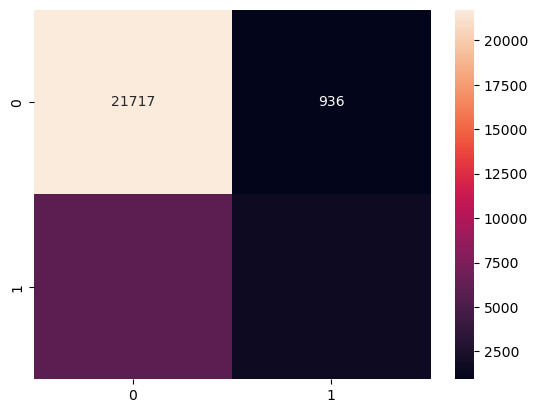

In [25]:
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [26]:
print(classification_report(Y,train_pred_m))

              precision    recall  f1-score   support

       <=50K       0.79      0.96      0.86     22653
        >50K       0.63      0.21      0.32      7508

    accuracy                           0.77     30161
   macro avg       0.71      0.59      0.59     30161
weighted avg       0.75      0.77      0.73     30161



## Built GaussianlNB model

In [27]:
classifier_gb=GB()
classifier_gb.fit(X,Y)

GaussianNB()

In [28]:
# Findin the accuracy for Training Data
train_pred_g = classifier_gb.predict(X)
accuracy_train_g = np.mean(train_pred_g==Y)
accuracy_train_g

0.8031563940187659

In [29]:
# Findin the accuracy for Testing Data
test_pred_g = classifier_gb.predict(x)
accuracy_test_g = np.mean(test_pred_g==y)
accuracy_test_g

0.8029216467463479

In [30]:
cm1=confusion_matrix(y,test_pred_g)
cm1

array([[9073, 2287],
       [ 681, 3019]], dtype=int64)

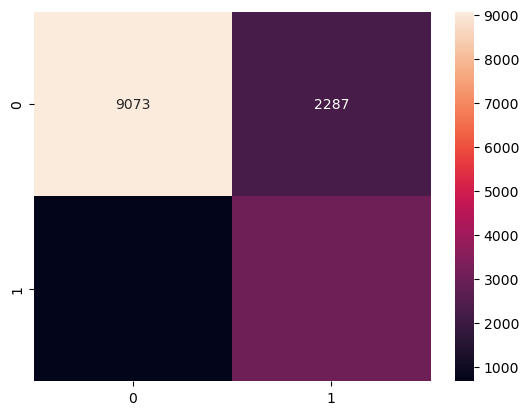

In [31]:
sns.heatmap(cm1, annot=True, fmt='d')
plt.show()

In [32]:
print(classification_report(y,test_pred_g))

              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86     11360
        >50K       0.57      0.82      0.67      3700

    accuracy                           0.80     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.80      0.81     15060



### So, we came to know GaussianNB model giving better accuracy than MultinominalNB model